In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet152V2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


In [2]:
train_path = 'C:/users/Karthik/Downloads/data/train'
test_path = 'C:/users/Karthik/Downloads/data/test'
train_gen = ImageDataGenerator(rescale=1.0/255.0,validation_split = 0.2)
test_gen = ImageDataGenerator(rescale=1.0/255.0)
train_data = train_gen.flow_from_directory(directory = train_path,target_size=(224,224),batch_size = 32, 
                                           subset = 'training',shuffle = True,color_mode = 'rgb')
val_data = train_gen.flow_from_directory(directory = train_path,target_size=(224,224),batch_size = 32, 
                                           subset = 'validation',shuffle = True,color_mode = 'rgb')
test_data = test_gen.flow_from_directory(directory = test_path,target_size=(224,224),batch_size = 32, shuffle = True,color_mode = 'rgb')

Found 2413 images belonging to 2 classes.
Found 602 images belonging to 2 classes.
Found 831 images belonging to 2 classes.


In [3]:
labels =train_data.class_indices.keys()
print("The classes are: ",end='')
for i in labels:
    print(i,end='   ')

The classes are: infected   notinfected   

In [4]:
def image_display(folder,label):
  plt.figure(figsize=(15,15))
  for i in range(3):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    ax.title.set_text(label)
    plt.imshow(img)

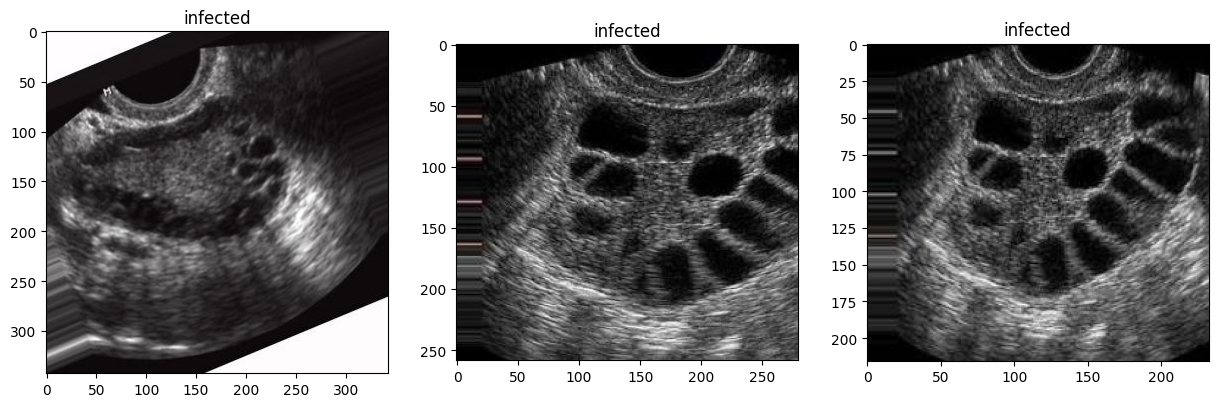

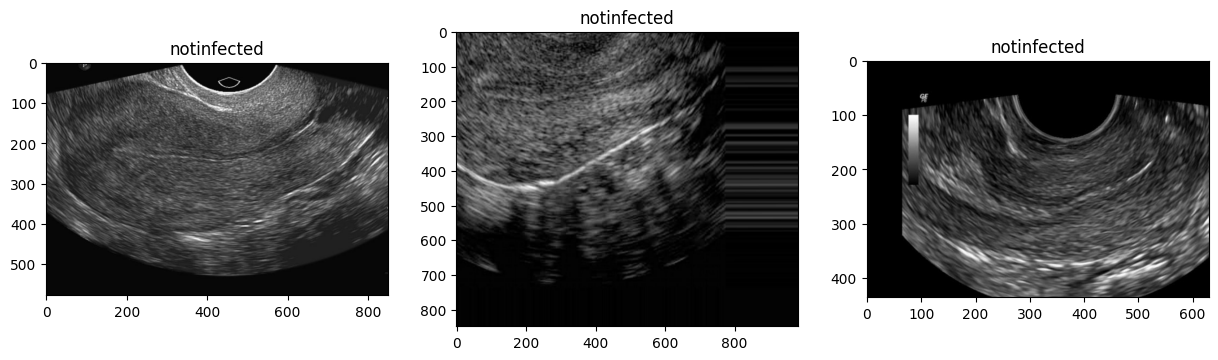

In [5]:
for label in labels:
    image_display(f"{train_path}/{label}",label)

In [6]:
lambda_ = 0.05
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same',strides=(1,1),input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(2,activation = 'sigmoid')),
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 54, 54, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 64)       0

In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history= model.fit(train_data,epochs=15, validation_data = val_data)
model.evaluate(test_data)


Epoch 1/15
76/76 [==============================] - 187s 2s/step - loss: 0.1072 - accuracy: 0.9722 - val_loss: 4.3294 - val_accuracy: 0.6179
Epoch 2/15
76/76 [==============================] - 179s 2s/step - loss: 0.0053 - accuracy: 0.9992 - val_loss: 8.6153 - val_accuracy: 0.6179
Epoch 3/15
76/76 [==============================] - 193s 3s/step - loss: 5.0433e-04 - accuracy: 1.0000 - val_loss: 8.1356 - val_accuracy: 0.6179
Epoch 4/15
76/76 [==============================] - 182s 2s/step - loss: 3.3110e-05 - accuracy: 1.0000 - val_loss: 7.7565 - val_accuracy: 0.6179
Epoch 5/15
76/76 [==============================] - 181s 2s/step - loss: 1.8345e-05 - accuracy: 1.0000 - val_loss: 6.0268 - val_accuracy: 0.6262
Epoch 6/15
76/76 [==============================] - 181s 2s/step - loss: 1.9573e-05 - accuracy: 1.0000 - val_loss: 3.8923 - val_accuracy: 0.6528
Epoch 7/15
76/76 [==============================] - 192s 3s/step - loss: 2.0469e-05 - accuracy: 1.0000 - val_loss: 1.9813 - val_accuracy: 

[0.01441777590662241, 0.9975932836532593]

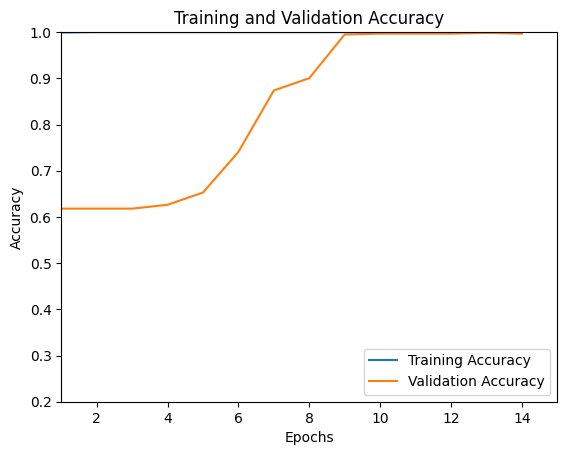

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim([0.2, 1])
plt.xlim([1,15])
plt.legend(loc='lower right')
plt.show()
